# New York Flights 


#### Carregar as bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import statsmodels.api as sm
from google.colab import drive

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Baixar a base de dados

In [2]:
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
df=pd.read_csv('/content/gdrive/My Drive/DEX02/nyflights (1).csv')

In [4]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00


In [6]:
df.shape

(336776, 19)

In [7]:
df.dtypes

year                int64
month               int64
day                 int64
dep_time          float64
sched_dep_time      int64
dep_delay         float64
arr_time          float64
sched_arr_time      int64
arr_delay         float64
carrier            object
flight              int64
tailnum            object
origin             object
dest               object
air_time          float64
distance            int64
hour                int64
minute              int64
time_hour          object
dtype: object

In [8]:
df.describe()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,336776.0,336776.000000,336776.000000,328521.000000,336776.000000,328521.000000,328063.000000,336776.000000,327346.000000,336776.000000,327346.000000,336776.000000,336776.000000,336776.000000
mean,2013.0,6.548510,15.710787,1349.109947,1344.254840,12.639070,1502.054999,1536.380220,6.895377,1971.923620,150.686460,1039.912604,13.180247,26.230100
std,0.0,3.414457,8.768607,488.281791,467.335756,40.210061,533.264132,497.457142,44.633292,1632.471938,93.688305,733.233033,4.661316,19.300846
min,2013.0,1.000000,1.000000,1.000000,106.000000,-43.000000,1.000000,1.000000,-86.000000,1.000000,20.000000,17.000000,1.000000,0.000000
25%,2013.0,4.000000,8.000000,907.000000,906.000000,-5.000000,1104.000000,1124.000000,-17.000000,553.000000,82.000000,502.000000,9.000000,8.000000
50%,2013.0,7.000000,16.000000,1401.000000,1359.000000,-2.000000,1535.000000,1556.000000,-5.000000,1496.000000,129.000000,872.000000,13.000000,29.000000
75%,2013.0,10.000000,23.000000,1744.000000,1729.000000,11.000000,1940.000000,1945.000000,14.000000,3465.000000,192.000000,1389.000000,17.000000,44.000000
max,2013.0,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,8500.000000,695.000000,4983.000000,23.000000,59.000000


###  Qual o comportamento médio e a variância dos dados dos voos que atrasam mais de duas horas?

### Filtrar quais são os voos na coluna 'dep_delay' que demoram atrasam mais de duas horas.

In [9]:
df120=df[df['dep_delay']>120]

In [10]:
df120.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
151,2013,1,1,848.0,1835,853.0,1001.0,1950,851.0,MQ,3944,N942MQ,JFK,BWI,41.0,184,18,35,2013-01-01 18:00:00
218,2013,1,1,957.0,733,144.0,1056.0,853,123.0,UA,856,N534UA,EWR,BOS,37.0,200,7,33,2013-01-01 07:00:00
268,2013,1,1,1114.0,900,134.0,1447.0,1222,145.0,UA,1086,N76502,LGA,IAH,248.0,1416,9,0,2013-01-01 09:00:00
491,2013,1,1,1540.0,1338,122.0,2020.0,1825,115.0,B6,705,N570JB,JFK,SJU,193.0,1598,13,38,2013-01-01 13:00:00
649,2013,1,1,1815.0,1325,290.0,2120.0,1542,338.0,EV,4417,N17185,EWR,OMA,213.0,1134,13,25,2013-01-01 13:00:00


###  Aplicação do describe e do .T sobre a coluna 'dep_delay'


In [11]:
df120new=pd.DataFrame(df120['dep_delay'].describe())
df120new=df120new.T

###  Criação e adição das colunas de variância e amplitude

In [12]:
df120new['var']=df120['dep_delay'].var()
df120new.head()

,count,mean,std,min,25%,50%,75%,max,var
dep_delay,9723.0,186.983236,74.596836,121.0,139.0,166.0,210.0,1301.0,5564.687952


In [13]:
dep_max=df['dep_delay'].max()
dep_min=df['dep_delay'].min()
df['range']=dep_max-dep_min 

### Plot de boxplot e histograma sobre o atraso dos voos

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


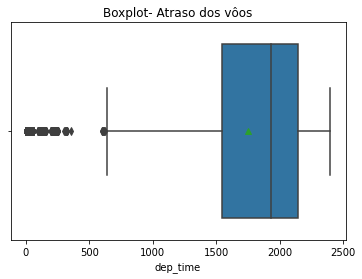

In [14]:
boxplot_dep=sns.boxplot(df120['dep_time'], showmeans=True)
boxplot_dep.set_title('Boxplot- Atraso dos vôos')
plt.show()

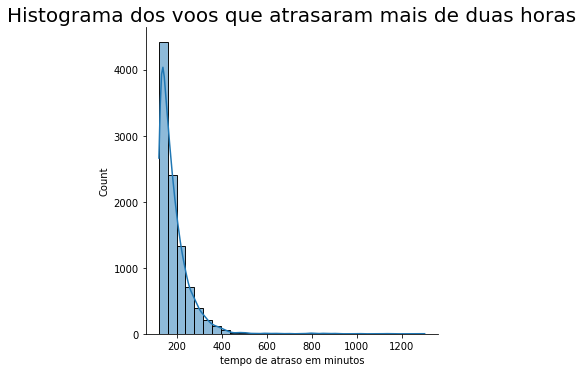

In [15]:
sns.displot(df120['dep_delay'], kind='hist', bins=30, kde=True)
plt.xlabel("tempo de atraso em minutos")
plt.title("Histograma dos voos que atrasaram mais de duas horas", fontsize=20)
plt.show() 

###  Quais destinos geraram voos com o maior número de atrasos na partida?

###  Filtrar a tabela com os registros que atrasam mais de 5 minutos

In [16]:
df_atrasos = df[df['dep_delay'] > 5]
df_atrasos

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,range
25,2013,1,1,608.0,600,8.0,807.0,735,32.0,MQ,3768,N9EAMQ,EWR,ORD,139.0,719,6,0,2013-01-01 06:00:00,1344.0
26,2013,1,1,611.0,600,11.0,945.0,931,14.0,UA,303,N532UA,JFK,SFO,366.0,2586,6,0,2013-01-01 06:00:00,1344.0
31,2013,1,1,623.0,610,13.0,920.0,915,5.0,AA,1837,N3EMAA,LGA,MIA,153.0,1096,6,10,2013-01-01 06:00:00,1344.0
41,2013,1,1,632.0,608,24.0,740.0,728,12.0,EV,4144,N13553,EWR,IAD,52.0,212,6,8,2013-01-01 06:00:00,1344.0
47,2013,1,1,644.0,636,8.0,931.0,940,-9.0,UA,1701,N75435,EWR,FLL,151.0,1065,6,36,2013-01-01 06:00:00,1344.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336759,2013,9,30,2207.0,2140,27.0,2257.0,2250,7.0,MQ,3660,N532MQ,LGA,BNA,97.0,764,21,40,2013-09-30 21:00:00,1344.0
336760,2013,9,30,2211.0,2059,72.0,2339.0,2242,57.0,EV,4672,N12145,EWR,STL,120.0,872,20,59,2013-09-30 20:00:00,1344.0
336762,2013,9,30,2233.0,2113,80.0,112.0,30,42.0,UA,471,N578UA,EWR,SFO,318.0,2565,21,13,2013-09-30 21:00:00,1344.0
336763,2013,9,30,2235.0,2001,154.0,59.0,2249,130.0,B6,1083,N804JB,JFK,MCO,123.0,944,20,1,2013-09-30 20:00:00,1344.0


In [17]:
df5atrasos = pd.DataFrame(df_atrasos['dest'].value_counts())

### Filtrar a coluna de destino para contar e encontrar os 5 últimos valores

In [18]:
df5piores = df5atrasos.sort_values(by=['dest'], ascending = False).head(5)

In [19]:
df5piores = df5piores.rename_axis('destinos').reset_index()
df5piores = df5piores.rename(columns={'dest':'quantidade'})

In [20]:
df5piores.head()

,destinos,quantidade
0,ORD,4975
1,ATL,4687
2,LAX,4442
3,MCO,4083
4,SFO,4078


In [21]:
mask = df[(df['dest'] == 'ORD') | (df['dest'] == 'ATL') | (df['dest'] == 'LAX') | (df['dest'] == 'MCO') | (df['dest'] == 'SFO')]

In [22]:
mask.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,range
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,1344.0
5,2013,1,1,554.0,558,-4.0,740.0,728,12.0,UA,1696,N39463,EWR,ORD,150.0,719,5,58,2013-01-01 05:00:00,1344.0
8,2013,1,1,557.0,600,-3.0,838.0,846,-8.0,B6,79,N593JB,JFK,MCO,140.0,944,6,0,2013-01-01 06:00:00,1344.0
9,2013,1,1,558.0,600,-2.0,753.0,745,8.0,AA,301,N3ALAA,LGA,ORD,138.0,733,6,0,2013-01-01 06:00:00,1344.0
12,2013,1,1,558.0,600,-2.0,924.0,917,7.0,UA,194,N29129,JFK,LAX,345.0,2475,6,0,2013-01-01 06:00:00,1344.0


### Cálculo da velocidade média dos voos

In [23]:
mask['vel(kmh)'] = (mask['distance']/(mask['air_time']/60)*1.6)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
mask.head()


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,range,vel(kmh)
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,1344.0,630.620690
5,2013,1,1,554.0,558,-4.0,740.0,728,12.0,UA,1696,N39463,EWR,ORD,150.0,719,5,58,2013-01-01 05:00:00,1344.0,460.160000
8,2013,1,1,557.0,600,-3.0,838.0,846,-8.0,B6,79,N593JB,JFK,MCO,140.0,944,6,0,2013-01-01 06:00:00,1344.0,647.314286
9,2013,1,1,558.0,600,-2.0,753.0,745,8.0,AA,301,N3ALAA,LGA,ORD,138.0,733,6,0,2013-01-01 06:00:00,1344.0,509.913043
12,2013,1,1,558.0,600,-2.0,924.0,917,7.0,UA,194,N29129,JFK,LAX,345.0,2475,6,0,2013-01-01 06:00:00,1344.0,688.695652


### Boxplot da Velocidade em km/h dos vôos

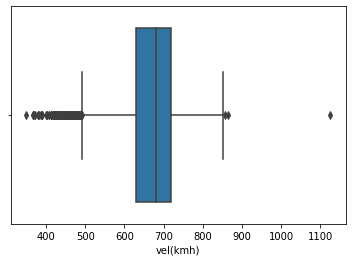

In [25]:
sns.boxplot(x=mask['vel(kmh)'])

###  Velocidade média dos piores voos

In [26]:
df5piores_velmed=pd.DataFrame(mask.groupby('dest').mean()['vel(kmh)'].reset_index())
df5piores_velmed

,dest,vel(kmh)
0,ATL,648.291367
1,LAX,724.478929
2,MCO,675.816848
3,ORD,609.808421
4,SFO,717.666871


### Gráfico boxplot dos 4 destinos com mais atrasos

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


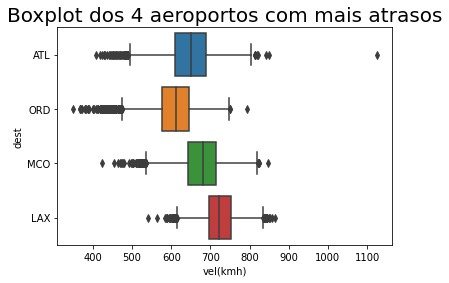

In [28]:
sns.boxplot(mask[mask['dest']!='SFO']['vel(kmh)'], mask[mask['dest']!='SFO']['dest'])
plt.title('Boxplot dos 4 aeroportos com mais atrasos', fontsize=20)
plt.show()

### Histograma da quantidade de atraso nos 5 piores aeroportos

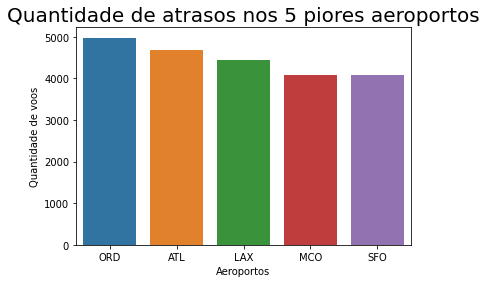

In [29]:
sns.barplot(x=df5piores['destinos'],y=df5piores['quantidade'])
plt.title('Quantidade de atrasos nos 5 piores aeroportos', fontsize=20)
plt.xlabel('Aeroportos')
plt.ylabel('Quantidade de voos')
plt.show()

### Bônus Catplot da velocidade média dos piores voos

Text(-0.5750000000000028, 0.5, 'Destino')

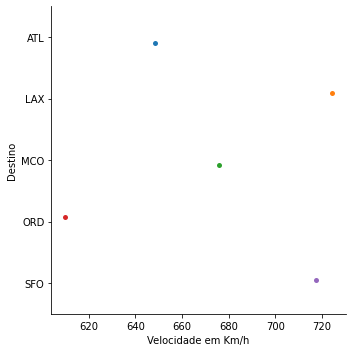

In [30]:
sns.catplot(x='vel(kmh)', y='dest', kind='strip', data=df5piores_velmed) 
plt.xlabel("Velocidade em Km/h") 
plt.ylabel("Destino")